In [7]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Dropout, Activation, MaxPooling2D
from tensorflow.keras.datasets import mnist
import numpy as np
from tensorflow.keras.utils import to_categorical
(X_entrenamiento, Y_entrenamiento), (X_pruebas, Y_pruebas) = mnist.load_data()

In [8]:
X_entrenamiento = X_entrenamiento.reshape(X_entrenamiento.shape[0], 28, 28, 1)
X_pruebas = X_pruebas.reshape(X_pruebas.shape[0], 28, 28, 1)

Y_entrenamiento = to_categorical(Y_entrenamiento)
Y_pruebas = to_categorical(Y_pruebas)

X_entrenamiento = X_entrenamiento.astype('float32') / 255
X_pruebas = X_pruebas.astype('float32') / 255

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

rotacion = 30
ancho = 0.35
alto = 0.35
inclinacion = 15
acercamiento = [0.5,1.5]

datagen = ImageDataGenerator(
    rotation_range = rotacion,
    width_shift_range = ancho,
    height_shift_range = alto,
    zoom_range=acercamiento,
    shear_range=inclinacion 
)

datagen.fit(X_entrenamiento)

ANTES:



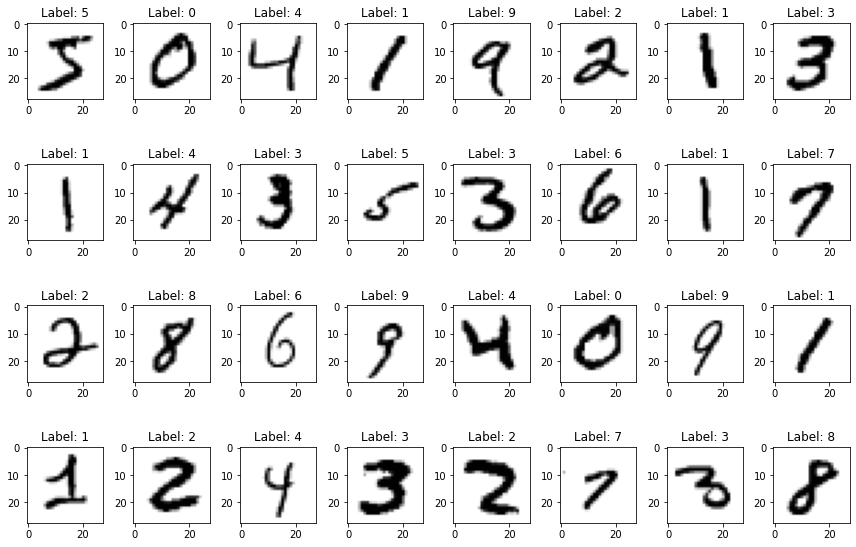

DESPUES:



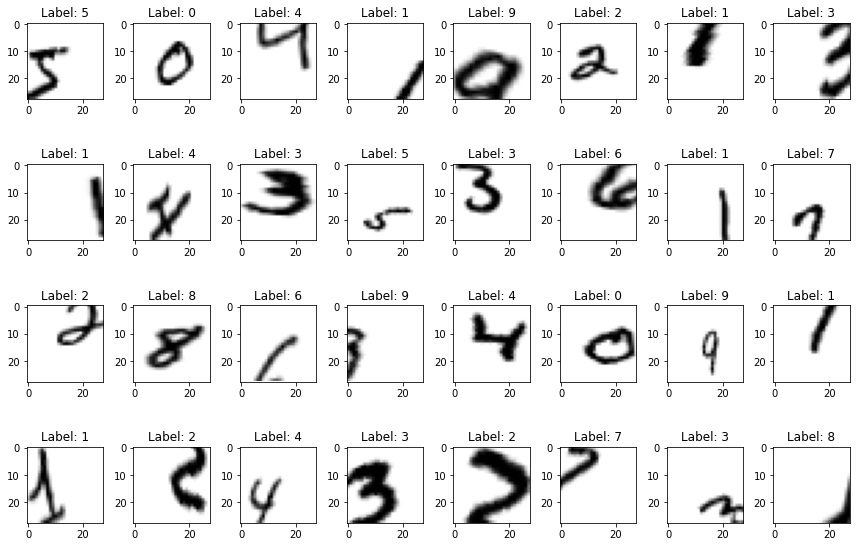

In [10]:
import matplotlib.pyplot as plt
filas = 4
columnas = 8
num = filas*columnas
print('ANTES:\n')
fig1, axes1 = plt.subplots(filas, columnas, figsize=(1.5*columnas,2*filas))
for i in range(num):
     ax = axes1[i//columnas, i%columnas]
     ax.imshow(X_entrenamiento[i].reshape(28,28), cmap='gray_r')
     ax.set_title('Label: {}'.format(np.argmax(Y_entrenamiento[i])))
plt.tight_layout()
plt.show()
print('DESPUES:\n')
fig2, axes2 = plt.subplots(filas, columnas, figsize=(1.5*columnas,2*filas))
for X, Y in datagen.flow(X_entrenamiento,Y_entrenamiento.reshape(Y_entrenamiento.shape[0], 10),batch_size=num,shuffle=False):
     for i in range(0, num):
          ax = axes2[i//columnas, i%columnas]
          ax.imshow(X[i].reshape(28,28), cmap='gray_r')
          ax.set_title('Label: {}'.format(int(np.argmax(Y[i]))))
     break
plt.tight_layout()
plt.show()

In [11]:
modelo = Sequential()
modelo.add(Conv2D(32,(3,3), input_shape=(28,28,1) ) )
modelo.add(Activation('relu'))
modelo.add(MaxPooling2D(2,2)  )

modelo.add(Conv2D(64,(3,3), input_shape=(28,28,1) ) )
modelo.add(Activation('relu'))

modelo.add(Dropout(0.5))
modelo.add(Flatten())

modelo.add(Dense(100))
modelo.add(Activation('relu'))

modelo.add(Dense(10))
modelo.add(Activation('softmax'))



In [12]:
modelo.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
data_gen_entrenamiento = datagen.flow(X_entrenamiento, Y_entrenamiento, batch_size=32)

In [14]:
TAMANO_LOTE = 32

print("Entrenando modelo...");
epocas=60
history = modelo.fit(
    data_gen_entrenamiento,
    epochs=epocas,
    batch_size=TAMANO_LOTE,
    validation_data=(X_pruebas, Y_pruebas),
    steps_per_epoch=int(np.ceil(60000 / float(TAMANO_LOTE))),
    validation_steps=int(np.ceil(10000 / float(TAMANO_LOTE)))
)

print("Modelo entrenado!");

Entrenando modelo...
Epoch 1/60
1875/1875 [==============================] - 42s 18ms/step - loss: 1.3953 - accuracy: 0.5244 - val_loss: 0.1795 - val_accuracy: 0.9514
Epoch 2/60
1875/1875 [==============================] - 34s 18ms/step - loss: 0.8828 - accuracy: 0.7137 - val_loss: 0.1138 - val_accuracy: 0.9652
Epoch 3/60
1875/1875 [==============================] - 34s 18ms/step - loss: 0.7390 - accuracy: 0.7583 - val_loss: 0.1504 - val_accuracy: 0.9535
Epoch 4/60
1875/1875 [==============================] - 34s 18ms/step - loss: 0.6692 - accuracy: 0.7808 - val_loss: 0.0929 - val_accuracy: 0.9696
Epoch 5/60
1875/1875 [==============================] - 33s 18ms/step - loss: 0.6259 - accuracy: 0.7946 - val_loss: 0.0886 - val_accuracy: 0.9704
Epoch 6/60
1875/1875 [==============================] - 33s 18ms/step - loss: 0.5927 - accuracy: 0.8057 - val_loss: 0.0951 - val_accuracy: 0.9675
Epoch 7/60
1875/1875 [==============================] - 34s 18ms/step - loss: 0.5747 - accuracy: 0.8127

In [15]:
modelo.save('numeros_conv_ad_do.h5')

#Convertirlo a tensorflow.js
!pip install tensorflowjs

!mkdir carpeta_salida

!tensorflowjs_converter --input_format keras numeros_conv_ad_do.h5 carpeta_salida

     |████████████████████████████████| 77 kB 3.9 MB/s 
     |████████████████████████████████| 462 kB 28.2 MB/s 
